In [2]:
import os
import zipfile
# name of the zip file you want to unzip
local_zip = 'glaucoma-detection.zip'
# opening a file with mode parameter 'r' : read existing file
zip_ref = zipfile.ZipFile(local_zip, 'r')
# extract all contents of the zip file
zip_ref.extractall('')
# close the file
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                                   horizontal_flip = True)

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                                   horizontal_flip = True)


In [8]:
training_set = train_datagen.flow_from_directory('Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 20,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation',
                                            target_size = (256, 256),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 520 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [29]:
training_set.class_indices

{'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}

In [9]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense,Dropout,Flatten

In [10]:
from tensorflow.keras.regularizers import l2


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dense,BatchNormalization,Dropout,GlobalAveragePooling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau   # To identify the best model 
from sklearn.metrics import classification_report

In [1]:
model_cnn=Sequential()

model_cnn.add(Conv2D(512,(3,3),input_shape = (256,256,3)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv2D(256,(3,3)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv2D(256,(3,3)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(BatchNormalization())


model_cnn.add(Conv2D(128,(3,3)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(BatchNormalization())


model_cnn.add(Conv2D(128,(3,3)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(BatchNormalization())

model_cnn.add(Flatten())
model_cnn.add(Dropout(0.25))

model_cnn.add(Dense(128,activation='relu'))

model_cnn.add(Dense(64,activation='relu'))

model_cnn.add(Dense(1,activation='softmax'))
model_cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [19]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 512)     14336     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 512)     0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 127, 127, 512)     2048      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 256)     1179904   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 256)       0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 62, 62, 256)       1024      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 256)      

In [ ]:
# Part 3 - Training the CNN

# Training the CNN on the Training set and evaluating it on the Test set
r=model_cnn.fit(x = training_set, validation_data = test_set, steps_per_epoch = 520/20, validation_steps = 130/20,epochs = 15,verbose = 1)

        

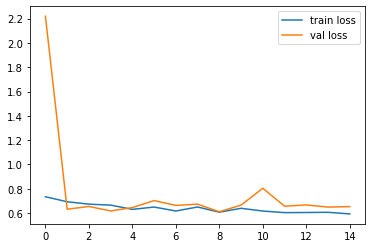

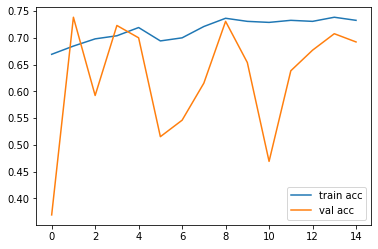

<Figure size 432x288 with 0 Axes>

In [38]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model_cnn.save('model_gl.h5')

In [66]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/036.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model_cnn.predict(test_image)

In [67]:
result

array([[0.4199128]], dtype=float32)

In [68]:
model_cnn.evaluate(training_set)

26/26 [==============================] - 226s 9s/step - loss: 0.6604 - accuracy: 0.6942


[0.6603640913963318, 0.6942307949066162]

In [69]:
model_cnn.evaluate(test_set)

7/7 [==============================] - 48s 7s/step - loss: 0.6449 - accuracy: 0.7231


[0.6449461579322815, 0.7230769395828247]

THE CODE FOR GENETIC ALGORITHM IS IMPLEMENTED BELOW

In [34]:
def CNN(nfilters,sfilters):
    model_cnn=Sequential()

    model_cnn.add(Conv2D(nfilters[0],(sfilters[0],sfilters[0]),input_shape = (256,256,3)))
    model_cnn.add(MaxPooling2D((2,2)))
    model_cnn.add(BatchNormalization())

    model_cnn.add(Conv2D(nfilters[1],(sfilters[1],sfilters[1])))
    model_cnn.add(MaxPooling2D((2,2)))
    model_cnn.add(BatchNormalization())

    model_cnn.add(Conv2D(nfilters[2],(sfilters[2], sfilters[2])))
    model_cnn.add(MaxPooling2D((2,2)))
    model_cnn.add(BatchNormalization())

    model_cnn.add(Flatten())
    model_cnn.add(Dropout(0.25))

    model_cnn.add(Dense(128,activation='relu'))

    model_cnn.add(Dense(64,activation='relu'))

    model_cnn.add(Dense(1,activation='sigmoid'))
    model_cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model_cnn

In [32]:
class Genetic:
    
    def __init__(self,pop_size,nlayers,max_nfilters,max_sfilters):
        self.pop_size = pop_size
        self.nlayers = nlayers
        self.max_nfilters = max_nfilters
        self.max_sfilters = max_sfilters
        self.max_acc = 0
        self.best_arch = np.zeros((1,6))
        self.gen_acc = []
    
    def generate_population(self):
        np.random.seed(0)
        pop_nlayers = np.random.randint(1,self.max_nfilters,(self.pop_size,self.nlayers))
        pop_sfilters = np.random.randint(1,self.max_sfilters,(self.pop_size,self.nlayers))
        pop_total = np.concatenate((pop_nlayers,pop_sfilters),axis=1)
        return pop_total
    
    def select_parents(self,pop,nparents,fitness):
        parents = np.zeros((nparents,pop.shape[1]))
        for i in range(nparents):
            best = np.argmax(fitness)
            parents[i] = pop[best]
            fitness[best] = -99999
        return parents
    
    def crossover(self,parents):
        nchild = self.pop_size - parents.shape[0]
        nparents = parents.shape[0]
        child = np.zeros((nchild,parents.shape[1]))
        for i in range(nchild):
            first = i % nparents
            second = (i+1) % nparents
            child[i,:2] = parents[first][:2]
            child[i,2] = parents[second][2]
            child[i,3:5] = parents[first][3:5]
            child[i,5] = parents[second][5]
        return child

    def mutation(self,child):
        for i in range(child.shape[0]):
            val = np.random.randint(1,6)
            ind = np.random.randint(1,4) - 1
            if child[i][ind] + val > 100:
                child[i][ind] -= val
            else:
                child[i][ind] += val
            val = np.random.randint(1,4)
            ind = np.random.randint(4,7) - 1
            if child[i][ind] + val > 20:
                child[i][ind] -= val
            else:
                child[i][ind] += val
        return child
    
    def fitness(self,pop,X,Y,epochs):
        pop_acc = []
        for i in range(pop.shape[0]):
            nfilters = pop[i][0:3]
            sfilters = pop[i][3:]
            model = CNN(nfilters,sfilters)
            H = model.fit(x = X, validation_data = Y, steps_per_epoch = 520/20, validation_steps = 130/20,epochs = epochs,verbose = 1)
            acc = H.history['accuracy']
            pop_acc.append(max(acc)*100)
        if max(pop_acc) > self.max_acc:
            self.max_acc = max(pop_acc)
            self.best_arch = pop[np.argmax(pop_acc)]
        self.gen_acc.append(max(pop_acc))
        return pop_acc
    
    def smooth_curve(self,factor,gen):
        smoothed_points = []
        for point in self.gen_acc:
            if smoothed_points:
                prev = smoothed_points[-1]
                smoothed_points.append(prev*factor + point * (1-factor))
            else:
                smoothed_points.append(point)
        plt.plot(range(gen+1),smoothed_points,'g',label='Smoothed training acc')
        plt.xticks(np.arange(gen+1))
        plt.legend()
        plt.title('Fitness Accuracy vs Generations')
        plt.xlabel('Generations')
        plt.ylabel('Fitness (%)')
        plt.show()

In [35]:
pop_size = 10 # population size 
nlayers = 3   # number of layers 
max_nfilters = 100 # number of filters for that layer 
max_sfilters = 20 # kernel size 
epochs = 20
num_generations = 10

genCNN = Genetic(pop_size,nlayers,max_nfilters,max_sfilters)
pop = genCNN.generate_population()

for i in range(num_generations+1):
    pop_acc = genCNN.fitness(pop,training_set,test_set,epochs)
    print('Best Accuracy at the generation {}: {}'.format(i,genCNN.max_acc))
    parents = genCNN.select_parents(pop,5,pop_acc.copy())
    child = genCNN.crossover(parents)
    child = genCNN.mutation(child)
    pop = np.concatenate((parents,child),axis=0).astype('int')

Epoch 1/20
 1/26 [>.............................] - ETA: 0s - loss: 0.6862 - accuracy: 0.7500

KeyboardInterrupt: 